***Notebook aimed on "playing" with different clustering algorithms and exploring a few performance metrics suited to each of them.***

# 0 - Main imports

In [1]:
from IPython.display     import HTML
from sklearn.datasets    import make_blobs
from sklearn.metrics     import davies_bouldin_score

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 8,5
display( HTML( '<style>.container { width:95% !important; }</style>' ) )

# 1 - KMeans

$P$ clusters with $n_k$ points each. Coordinates of the $N$ points (records) respectively given by ($\mathbb{R}^M$, for $M$ features): $C_k$ (k-th centroid) and $x_{i,k}$ (i-th point of the k-th cluster)

1. Distortion score
    - Cohesion-focused
    - Should be minimized
    - Based on the inertia metric (Within Clusters Sum of Squares - WSS)
\begin{equation}
    WSS = \Sigma^P_{k=1} \Sigma^{n_k}_{i=1} ||x_{i,k} - C_k||^2
\end{equation}

2. Silhouette score
    - Cohesion VS Separation
    - Should be maximized
    - Ranges from +1 (point belongs to "right" cluster) to -1 (point associated to "wrong" cluster)
    - For a point $\ell = (i,k)$:
\begin{align}
    S(\ell) &= \frac{b(\ell) - a(\ell)}{\max[a(\ell),b(\ell)]} \; \text{if} \; n_k>1 \; \text{else} \; S(\ell)=1 \\ 
    a(\ell) &= \frac{1}{n_k-1} \Sigma^{n_k}_{j=1, j\neq i} ||x_{\ell} - x_{j,k}|| \\
    b(\ell) &= \min_{m \neq k} \frac{1}{n_m} \Sigma_{j=1}^{n_m} ||x_{\ell} - x_{j,m}||
\end{align}

    - $a(\ell) \sim$ similarity to own cluster, whereas $b(\ell) \sim$ dissimilarity to other clusters
    - Overall silhouette score (for elbow method) is given by the average of the individual scores
    
    
3. Calinski-Harabasz score
    - Cohesion VS Separation
    - AKA Variance Ratio Criterion
    - Ratio of: between-clusters dispersion and of inter-cluster dispersion
    - Should be maximized
\begin{align}
    CH &= \frac{\Sigma_{k=1}^P n_k ||C_k - C||^2}{P-1} \times \frac{N-P}{\Sigma_{k=1}^P \Sigma_{i=1}^{n_k} ||x_{i,k} - C_k||^2} \\
    C &= \frac{1}{P} \Sigma_{k=1}^P C_k
\end{align}
    
4. Davies-Bouldin score
    - Cohesion VS Separation
    - Should be minimized
\begin{align}
    DB &= \frac{1}{P} \Sigma_{k=1}^P \max_{m \neq k} R_{mk} \\
    R_{mk} &= \frac{s_m + s_k}{||C_m - C_k||} \\
    s_m & = \frac{1}{n_m} \Sigma^{n_m}_{i=1} ||x_{i,m} - C_m||
\end{align}

In [3]:
from sklearn.cluster     import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

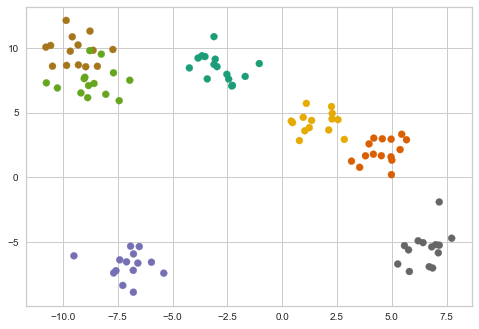

In [4]:
x, y = make_blobs( n_samples=100, n_features=2, centers=7, cluster_std=1.0, random_state=42 )
plt.scatter( x[:,0], x[:,1], c=y, cmap='Dark2' );

In [6]:
clusters = range(2,10)
inertia = []

for k in clusters:
    km = KMeans( n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42 )
    km_fit = km.fit( x )
    inertia.append( km_fit.inertia_ )

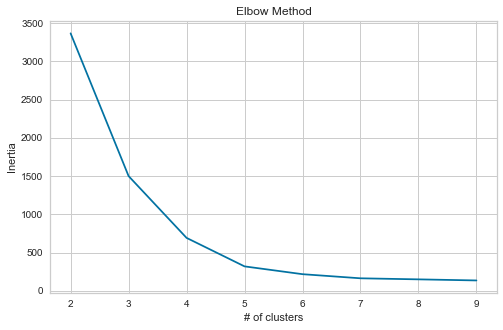

In [7]:
plt.plot( clusters, inertia );
plt.title( 'Elbow Method' )
plt.ylabel( 'Inertia' );
plt.xlabel( '# of clusters' );

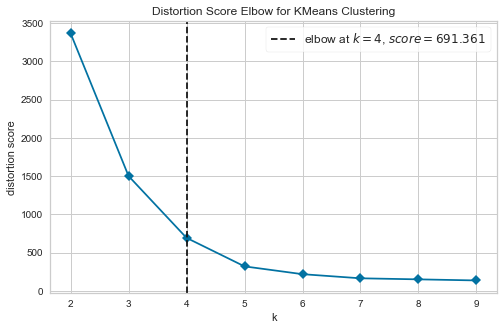

In [8]:
visualizer = KElbowVisualizer( km, k=clusters, timings=False )
visualizer.fit( x )
visualizer.show();


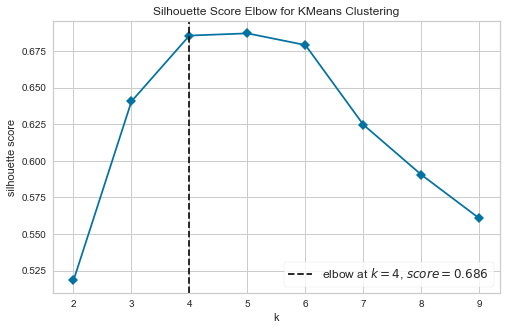

In [9]:
# Silhouette
visualizer = KElbowVisualizer( km, k=clusters, metric='silhouette', timings=False )
visualizer.fit( x )
visualizer.show();

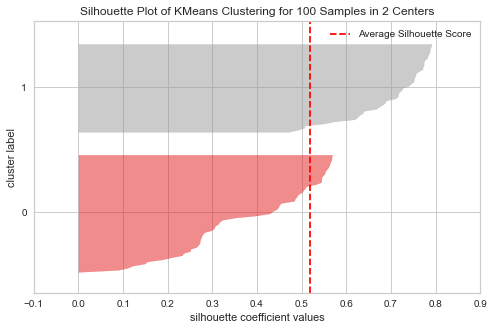

In [10]:
viz = SilhouetteVisualizer( KMeans( n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();


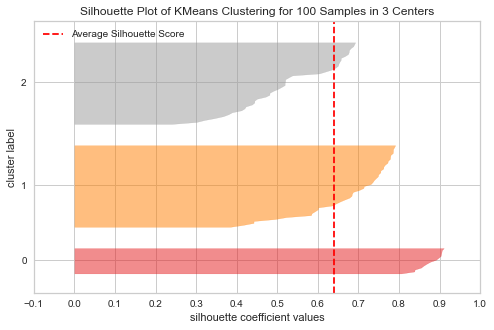

In [11]:
viz = SilhouetteVisualizer( KMeans( n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();

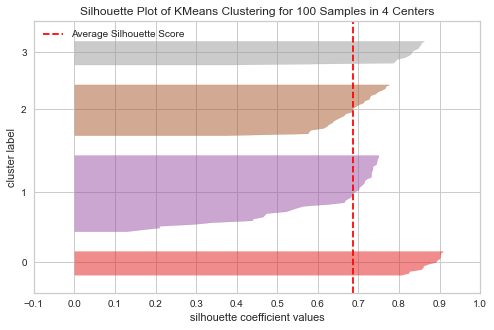

In [12]:
viz = SilhouetteVisualizer( KMeans( n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();

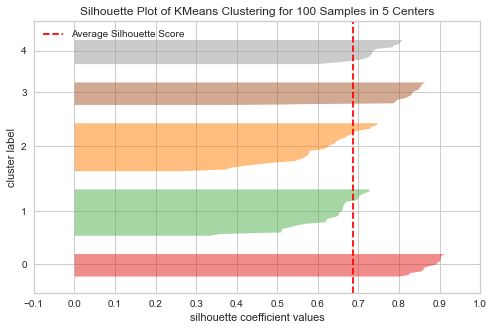

In [13]:
viz = SilhouetteVisualizer( KMeans( n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();

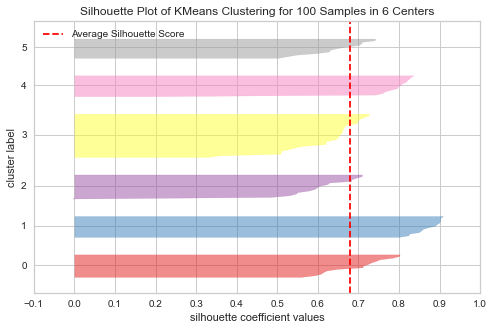

In [14]:
viz = SilhouetteVisualizer( KMeans( n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();

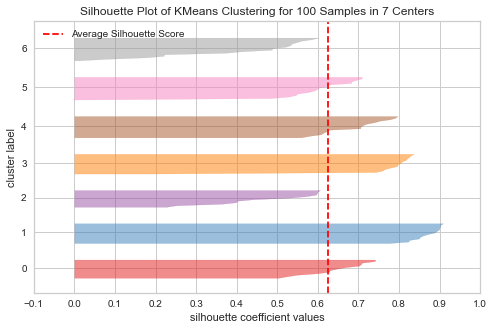

In [15]:
viz = SilhouetteVisualizer( KMeans( n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=42 ) )
viz.fit( x )
viz.show();

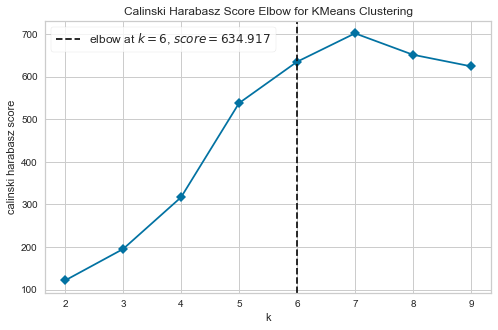

In [16]:
# Calinski-Harabasz
visualizer = KElbowVisualizer( km, k=clusters, metric='calinski_harabasz', timings=False )
visualizer.fit( x )
visualizer.show();

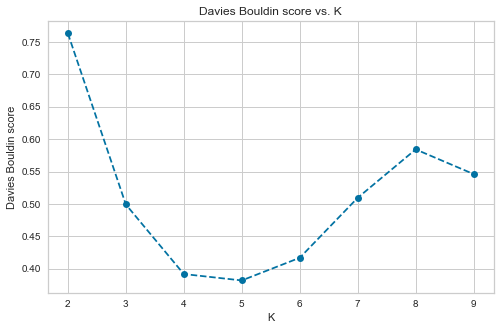

In [17]:
scores = []
for k in clusters:
    km = KMeans( n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42 ).fit_predict( x )
    scores.append( davies_bouldin_score(x, km) )
    
plt.plot(clusters, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [6]:
l5 = KMeans( n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42 ).fit( x ).labels_
l6 = KMeans( n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=42 ).fit( x ).labels_
l7 = KMeans( n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=42 ).fit( x ).labels_

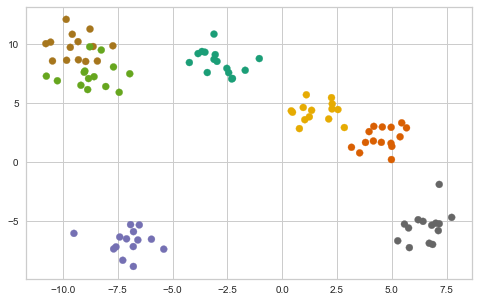

In [19]:
x, y = make_blobs( n_samples=100, n_features=2, centers=7, cluster_std=1.0, random_state=42 )
plt.scatter( x[:,0], x[:,1], c=y, cmap='Dark2' );

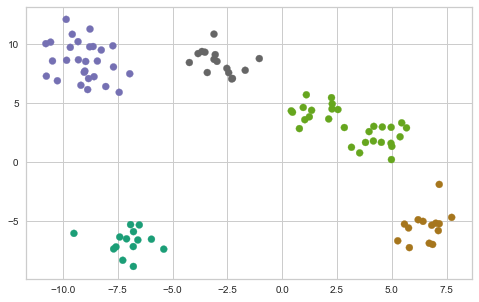

In [20]:
plt.scatter( x[:,0], x[:,1], c=l5, cmap='Dark2' );




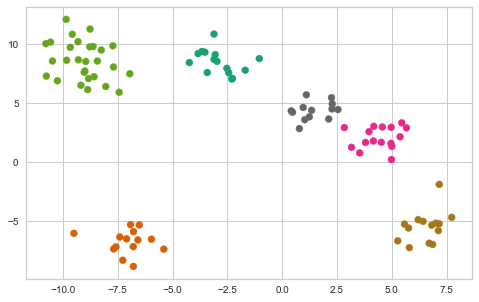

In [21]:
plt.scatter( x[:,0], x[:,1], c=l6, cmap='Dark2' );

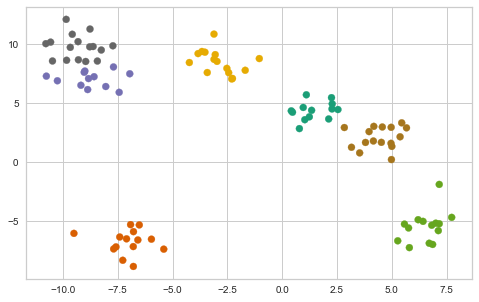

In [22]:
plt.scatter( x[:,0], x[:,1], c=l7, cmap='Dark2' );